# Graded Challenge 3

Nama    : Rizky Chester Abadi

Batch   : RMT-029

Program ini bertujuan untuk pengambilan, pengolahan, dan analisis data dari data hasil webscrapping


In [7]:
from bs4 import BeautifulSoup
from selenium import webdriver

from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager

import pandas as pd
import time
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Mengimport Ekstensi yang akan digunakan dan Webdriver untuk Webscrapping dan pengolahan data 

## A.Webscrapping

In [8]:
#Mengambil data dari web yang ingin di scrapping
url = 'https://www.tokopedia.com/search?navsource=&page=1&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st='
driver = webdriver.Chrome() #Menjalankan Webdriver Chrome
driver.get(url)
html = driver.page_source

soup = BeautifulSoup(html, "html.parser")

# print(soup.prettify()[:700])

menggunakan webdriver untuk mengakses website yang akan diambil datanya

In [9]:
# membuat variable sementara untuk data Nama Produk, Harga Produk, Penjual, Kota Toko, Banyaknya Terjual, dan Rating Produk 
Nama_Produk =[]
Harga_Produk = []
Penjual_Produk= []
Kota_Produk= []
Terjual_Produk= []
Rating_Produk= []

html = driver.page_source

driver = webdriver.Chrome() #Menjalankan Webdriver Chrome
soup = BeautifulSoup(html, "html.parser")

time.sleep(3) #jeda 3 detik tiap load halaman

#Looping untuk scrapping data di halaman 1-10
for h in range(1,11):
    url  =f"https://www.tokopedia.com/search?navsource=&page={h}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st="
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html,"html.parser")

    table = soup.find('div',{"class": "css-llwpbs"})  
    
    # Function untuk scraping data dengan class tertentu
    Produk = table.find_all('div',{"class":"prd_link-product-name"})
    Harga = table.find_all('div',{"class":"prd_link-product-price"})
    Penjual = table.find_all('span',{"class":"prd_link-shop-name"})
    Kota = table.find_all('span',{"class":"prd_link-shop-loc"})
    Terjual = table.find_all('span',{"class":"prd_label-integrity"})
    Rating = table.find_all('span',{"class":"prd_rating-average-text"})

    
    for elem in Produk:
        # extract text dari elemen
        if elem != None:
            text = elem.get_text()
        else:
            text = None

        # append text to listNames
        Nama_Produk.append(text)

    for elem in Harga:
        # extract text dari elemen
        if elem != None:
            text = elem.get_text()
        else:
            text = None

        # append text to list
        Harga_Produk.append(text)


    for elem in Penjual:
        # extract text dari elemen
        if elem != None:
            text = elem.get_text()
        else:
            text = None

        # append text to list
        Penjual_Produk.append(text)

    for elem in Kota:
         # extract text dari elemen
        if elem != None:
            text = elem.get_text()
        else:
            text = None

        # append text to list
        Kota_Produk.append(text)

    for elem in Terjual:
            # extract text dari elemen
        if elem != None:
            text = elem.get_text()
        else:
                text = None

            # append text to list
        Terjual_Produk.append(text)


    for elem in Rating:
            # extract text dari elemen
        if elem != None:
            text = elem.get_text()
        else:
            text = None

            # append text to list
        Rating_Produk.append(text)

# menutup driver
driver.quit()


# Membuat Dataframe untuk menyimpan data hasil scraping
df_seblak = pd.DataFrame()

# Membuat Kolom baru untuk dataframe
df_seblak['Nama Produk'] = Nama_Produk
df_seblak['Harga'] = Harga_Produk
df_seblak['Penjual'] = Penjual_Produk
df_seblak['Kota Toko'] = Kota_Produk
df_seblak['Terjual'] = Terjual_Produk
df_seblak['Rating Produk'] = Rating_Produk

df_seblak



,Nama Produk,Harga,Penjual,Kota Toko,Terjual,Rating Produk
0,Kylafood Seblak Cup,Rp12.788,kylafood,Bandung,100+ terjual,4.7
1,Kylafood Mix Fav Selebgram Seblak Original & B...,Rp47.840,kylafood,Bandung,100+ terjual,4.8
2,Pasar Keripik Kerupuk Seblak Mawar Mini Pedas ...,Rp28.500,Pasar Keripik Bandung,Bandung,17 terjual,5.0
3,Baso Aci Kriboow Special Keju Selera Martini,Rp25.500,Foodstocks,Jakarta Selatan,100+ terjual,4.9
4,Keripik Ubi Ungu Sari Roso,Rp26.000,Pisang Goreng Madu Bu Nanik,Jakarta Barat,250+ terjual,5.0
5,Seblak Kering Gurih 65gram - Cikuran 65gr,Rp10.965,Lidigeli,Kab. Garut,100+ terjual,5.0
6,Cimol Spicy Lava Kylafood,Rp27.075,kylafood,Bandung,750+ terjual,4.9
7,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,Rp17.000,Central Seblak Nusantara,Tangerang Selatan,2rb+ terjual,4.9
8,Kylafood Seblak Cup,Rp12.788,kylafood,Bandung,100+ terjual,4.7


Hasil dari scraping dari 10 halaman tentang seblak tanpa missing value ada 10 data seblak yang didapat.

## B.Data Preparation

In [10]:
df_seblak.head() #menampilkan beberapa list data dari data yang telah diambil mulai dari paling atas

,Nama Produk,Harga,Penjual,Kota Toko,Terjual,Rating Produk
0,Kylafood Seblak Cup,Rp12.788,kylafood,Bandung,100+ terjual,4.7
1,Kylafood Mix Fav Selebgram Seblak Original & B...,Rp47.840,kylafood,Bandung,100+ terjual,4.8
2,Pasar Keripik Kerupuk Seblak Mawar Mini Pedas ...,Rp28.500,Pasar Keripik Bandung,Bandung,17 terjual,5.0
3,Baso Aci Kriboow Special Keju Selera Martini,Rp25.500,Foodstocks,Jakarta Selatan,100+ terjual,4.9
4,Keripik Ubi Ungu Sari Roso,Rp26.000,Pisang Goreng Madu Bu Nanik,Jakarta Barat,250+ terjual,5.0


menampilkan beberapa list data dari data frame df_seblak yang didapat dari scraping dari pencarian teratas

In [11]:
df_seblak.tail() #menampilkan beberapa list data yang didapat dari bawah

,Nama Produk,Harga,Penjual,Kota Toko,Terjual,Rating Produk
4,Keripik Ubi Ungu Sari Roso,Rp26.000,Pisang Goreng Madu Bu Nanik,Jakarta Barat,250+ terjual,5.0
5,Seblak Kering Gurih 65gram - Cikuran 65gr,Rp10.965,Lidigeli,Kab. Garut,100+ terjual,5.0
6,Cimol Spicy Lava Kylafood,Rp27.075,kylafood,Bandung,750+ terjual,4.9
7,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,Rp17.000,Central Seblak Nusantara,Tangerang Selatan,2rb+ terjual,4.9
8,Kylafood Seblak Cup,Rp12.788,kylafood,Bandung,100+ terjual,4.7


menampilkan beberapa list data dari data frame df_seblak yang didapat dari scraping dari paling bawah

In [21]:
df_seblak_clean =df_seblak.dropna() #syntax untuk cek missing value dan menghapus data yang hilang dengan dropna
df_seblak_clean

,Nama Produk,Harga,Penjual,Kota Toko,Terjual,Rating Produk
0,Kylafood Seblak Cup,Rp12.788,kylafood,Bandung,100+ terjual,4.7
1,Kylafood Mix Fav Selebgram Seblak Original & B...,Rp47.840,kylafood,Bandung,100+ terjual,4.8
2,Pasar Keripik Kerupuk Seblak Mawar Mini Pedas ...,Rp28.500,Pasar Keripik Bandung,Bandung,17 terjual,5.0
3,Baso Aci Kriboow Special Keju Selera Martini,Rp25.500,Foodstocks,Jakarta Selatan,100+ terjual,4.9
4,Keripik Ubi Ungu Sari Roso,Rp26.000,Pisang Goreng Madu Bu Nanik,Jakarta Barat,250+ terjual,5.0
5,Seblak Kering Gurih 65gram - Cikuran 65gr,Rp10.965,Lidigeli,Kab. Garut,100+ terjual,5.0
6,Cimol Spicy Lava Kylafood,Rp27.075,kylafood,Bandung,750+ terjual,4.9
7,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,Rp17.000,Central Seblak Nusantara,Tangerang Selatan,2rb+ terjual,4.9
8,Kylafood Seblak Cup,Rp12.788,kylafood,Bandung,100+ terjual,4.7


hasil dari cek missing value menggunakan dropna, sudah tidak ada data dengan value yang kosong

In [22]:
#Menghilangkan Simbol-simbol dalam kolom Harga
df_seblak_clean['Harga'] = df_seblak_clean['Harga'].str.replace(r'\D', '', regex=True).astype(int)


Menghilangkan simbol- simbol dalam kolom harga agar berupa angka saja dan menjadikan tipe data menjadi int

In [23]:
#Menghilangkan Simbol + dan str terjual dalam kolom Terjual
df_seblak_clean['Terjual'] = df_seblak_clean['Terjual'].str.replace(r' terjual', '')

Menghilangkan Kata terjual dari kolom Terjual

In [24]:
df_seblak_clean['Terjual'] = df_seblak_clean['Terjual'].str.replace(r'rb', '000')

Menghilangkan kata rb dari kolom Terjual dan merubahnya menjadi 000

In [25]:
df_seblak_clean['Terjual'] = df_seblak_clean['Terjual'].str.replace(r'\+', '', regex=True).astype(int)

menghilangkan simbol + dari kolom Terjual dan merubah tipe data-datanya menjadi int

In [26]:
df_seblak_clean['Rating Produk'] = df_seblak_clean['Rating Produk'].str.replace(r'\D', '', regex=True).astype(int)

Menghilangkan simbol-simbol dari kolom Rating Produk dan merubahnya menjadi int

In [27]:
df_seblak_clean

,Nama Produk,Harga,Penjual,Kota Toko,Terjual,Rating Produk
0,Kylafood Seblak Cup,12788,kylafood,Bandung,100,47
1,Kylafood Mix Fav Selebgram Seblak Original & B...,47840,kylafood,Bandung,100,48
2,Pasar Keripik Kerupuk Seblak Mawar Mini Pedas ...,28500,Pasar Keripik Bandung,Bandung,17,50
3,Baso Aci Kriboow Special Keju Selera Martini,25500,Foodstocks,Jakarta Selatan,100,49
4,Keripik Ubi Ungu Sari Roso,26000,Pisang Goreng Madu Bu Nanik,Jakarta Barat,250,50
5,Seblak Kering Gurih 65gram - Cikuran 65gr,10965,Lidigeli,Kab. Garut,100,50
6,Cimol Spicy Lava Kylafood,27075,kylafood,Bandung,750,49
7,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,Central Seblak Nusantara,Tangerang Selatan,2000,49
8,Kylafood Seblak Cup,12788,kylafood,Bandung,100,47


Dataframe df_seblak_clean setelah data-data angkanya dirubah menjadi int

In [ ]:
print(df_seblak_clean.dtypes)

Nama Produk      object
Harga             int32
Penjual          object
Kota Toko        object
Terjual           int32
Rating Produk     int32
dtype: object


Melakukan cek tipe data dalam kolom-kolom df_seblak_clean

## C.Business Understanding/Problem Statement

Membuat problem statement berdasarkan S M A R T berdasarkan data yang telah didapat dan diolah produk seblak dalam website tokopedia.
    Beberapa Produk dari Kylafood lebih banyak terjual dari kota Bandung dan begitu juga produk dari Central Seblak Nusantara Tangerang Selatan, untuk kota Jakarta  dan sekitarnya penjualannya masih kalah padahal beberapa memiliki rating produk lebih tinggi.

Specific: Bagian Marketing pemilik toko yang barangnya kurang laku terjual perlu mencontoh dan mereapkan bagaimana toko lain menjual produk seblaknya yang menjual dengan porsi besar dan diskon

Measurable: Menambahkan item seblak yang dijual dalam bentuk paket dengan beberapa dan menjual dengan harga lebih murah 5% dibandingkan dengan saat dijual per itemnya 

Achievable: berdasarkan dengan pemilihan paket seblak yang tepat dan varian seblak dalam paket yang ditambahkan dapat meningkatkan penjualan sebesar 10%

Relevant: Mengurangi jumlah penjualan per item dan lebih banyak menjual per paket Seblak lebih banyak di cari oleh konsumen 

Time Bound:Dalam satu quartal kedepan berupaya untuk meningkatkan penjualan sebesar 10%


## D.Analysis

1. Mengitung rata-rata, median, standar deviasi, skewness, dan kurtosis dari kolom harga, banyak produk terjual, dan rating. Dan menyertakan insight dari apa saja yang bisa kamu dapatkan khususnya terkait dengan produk seblak dan datanya (distribusi dan kecenderungan ada/tidaknya outlier)

In [ ]:
# Menghitung mean, median, modus dari kolom Harga
mean_harga = round(df_seblak_clean['Harga'].mean(),0)
median_harga = round(df_seblak_clean['Harga'].median(),0)
std_harga = df_seblak_clean['Harga'].std()

print('harga rata-rata:', mean_harga)
print('Nilai tengah dari Harga:', median_harga)
print('Standar Deviasi dari Harga:', std_harga)
print(f"Skewness:{df_seblak_clean['Harga'].skew()}" )

harga rata-rata: 31666.0
Nilai tengah dari Harga: 19660.0
Standar Deviasi dari Harga: 28272.493941206456
Skewness:1.921182778185771


Hasil perhitungan dari kolom Harga nilai rata-rata dan standar deviasi mendekati, sedangkan nilai median sedikit jauh diatas. Nilai skewness 1.92


In [ ]:
# Menghitung mean, median, modus dari kolom Terjual
mean_terjual = round(df_seblak_clean['Terjual'].mean(),0)
median_terjual = round(df_seblak_clean['Terjual'].median(),0)
std_terjual = df_seblak_clean['Terjual'].std()

print('rata-rata produk terjual:', mean_terjual)
print('Nilai tengah dari Produk terjual:', median_terjual)
print('Standar Deviasi dari Produk terjual:', std_terjual)
print(f"Skewness:{df_seblak_clean['Terjual'].skew()}" )

rata-rata produk terjual: 978.0
Nilai tengah dari Produk terjual: 250.0
Standar Deviasi dari Produk terjual: 1315.9473520370536
Skewness:1.582109631507529


Hasil perhitungan dari kolom Terjual. nilai mean dan standar deviasi mendekati, sedangkan nilai median sedikit jauh dibawah. Nilai Skewness 1.58

In [ ]:
# Menghitung mean, median, modus dari kolom Rating Pro
mean_rating = round(df_seblak_clean['Rating Produk'].mean(),0)
median_rating = round(df_seblak_clean['Rating Produk'].median(),0)
std_rating = df_seblak_clean['Rating Produk'].std()


print('rata-rata rating produk:', mean_rating)
print('Nilai tengah dari rating produk:', median_rating)
print('Standar Deviasi dari rating produk:', std_rating)
print(f"Skewness:{df_seblak_clean['Rating Produk'].skew()}" )

rata-rata rating produk: 49.0
Nilai tengah dari rating produk: 49.0
Standar Deviasi dari rating produk: 0.8755950357709131
Skewness:-0.2234505289774602


Hasil perhitungan dari kolom Rating Produk nilai mean,median sama, hasi standar deviasi 0.8 dan skewness -0.2

2. Potensi minimum dan maksimum pendapatan jika menjual produk seblak dilihat dengan data yang telah didapat dengan kondisi terdistribusi normal dan menggunakan Confidence Interval.

In [ ]:
# Menghitung potensi maksimum dan potensi minimum menggunakan confidence interval


std = df_seblak_clean['Terjual'].std()
N= len(df_seblak_clean)
low, up = stats.norm.interval(0.95,loc=df_seblak_clean['Terjual'].mean(),scale=std_terjual/np.sqrt(N))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 162.2823684330922
Upper Limit: 1793.5176315669078


Potensi maksimum yang didapat sebesar 162.29(pembulatan) dan potensi minimum  sebesar 1793.52(pembulatan) jika menjual seblak lewat tokopedia

3. Barang di Jabodetabek dan di luar Jabodetabek memiliki perbedaan penjualan. Jika dijelaskan dengan hipotesis menggunakan Hipotesis Two Sample Test dan Independet:
h0 : penjualan barang di jabodetabek dan di luar jabodetabek tidak berbeda jauh
h1 : penjualan barang di jabodetabek dan di luar jabodetabek sangat berbeda jauh


In [ ]:
# Terjual atau Penjualan Bulanan
#Membuat List yang termasuk Jabodetabek dan bukan dengan groupby
filter_jkt = df_seblak_clean[df_seblak_clean['Kota Toko'].isin(['Tangerang Selatan','Jakarta Selatan','Jakarta Barat','Kab. Bogor'])]
filter_nonjkt = df_seblak_clean[df_seblak_clean['Kota Toko'].isin(['Bandung','Kab. Garut','Tasikmalaya'])]

Jabodetabek = filter_jkt.groupby('Kota Toko').agg({'Terjual': 'mean', 'Harga': 'mean', 'Rating Produk': 'mean'})
Non_Jabodetabek = filter_nonjkt.groupby('Kota Toko').agg({'Terjual': 'mean', 'Harga': 'mean', 'Rating Produk': 'mean'})





In [ ]:
#Menampilkan data yang termasuk  Jabodetabek
Jabodetabek

,Terjual,Harga,Rating Produk
Kota Toko,,,
Jakarta Barat,250.000000,26000.000000,50.000000
Jakarta Selatan,100.000000,22320.000000,48.000000
Kab. Bogor,50.000000,10000.000000,48.000000
Tangerang Selatan,1366.666667,16333.333333,49.333333


In [ ]:
#Menampilkan data yang tidak termasuk  Jabodetabek
Non_Jabodetabek


,Terjual,Harga,Rating Produk
Kota Toko,,,
Bandung,2500.0,56220.0,48.5
Kab. Garut,250.0,35000.0,50.0
Tasikmalaya,29.0,61899.0,50.0


In [ ]:
print('Penjualan bulanan dari Jabodetabek =',Jabodetabek['Terjual'].mean())
print('Penjualan bulanan dari non Jabodetabek =',Non_Jabodetabek['Terjual'].mean())

Penjualan bulanan dari Jabodetabek = 441.6666666666667
Penjualan bulanan dari non Jabodetabek = 926.3333333333334


Penjualan bulanan dari Non jabodetabek lebih tinggi dibandingkan dengan Jabodetabek

4. kecenderungan orang lebih suka produk yang mana dapat dilihat dengan analisis nilai korelasinya 

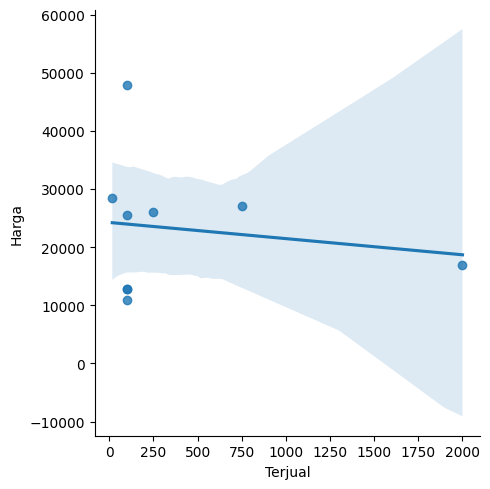

In [32]:
sns.lmplot(data=df_seblak_clean,x='Terjual', y='Harga')

In [29]:
corr_r, pval_p = stats.pearsonr(df_seblak_clean['Terjual'], df_seblak_clean['Harga'])
corr_rho, pval_s = stats.spearmanr(df_seblak_clean['Terjual'], df_seblak_clean['Harga'])
corr_tau, pval_k = stats.kendalltau(df_seblak_clean['Terjual'], df_seblak_clean['Harga'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: -0.15, p-value: 0.6912431815742092
rho-correlation: -0.06, p-value: 0.8882331213937898
tau-correlation: 0.00, p-value: 1.0


In [ ]:
t_stat, p_val = stats.ttest_ind(Jabodetabek['Terjual'],Non_Jabodetabek['Terjual'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: -0.6409181432355424
P-value: 0.5497931611696136


Orang cenderung lebih suka dengan produk dari luar Jabodetabek ,walaupun lebih mahal secara harga namun berisi lebih banyak item dibandingkan dengan beli item satuan.

## E.Conclusion / Kesimpulan

Kesimpulan dari Analisis Penjualan bulanan daerah Jabodetabek dengan Wilayah diluar Jabodetabek dilihat adalah produk luar Jabodetabek lebih laku daripada produk Jabodetabek. Hal ini juga tergantung dari Rating dan Harga selain dari Produk yang Terjual.